In [31]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings('ignore')
sns.set()

In [19]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/HP/Documents/9-Master Big Data - Daniela/(MBD-2324) Trabajo Fin de Máster O1/cars_publications.csv')
print(df.shape)
df.head(10)

(20303, 8)


,marca,modelo,año,kilometraje,version,transmision,precio (MXN),ubicacion
0,Kia,Soul,2020,25606,1.6 LX AUTO,Automático,262999,Guadalajara
1,Nissan,Versa,2017,108034,1.6 SENSE AUTO,Automático,160999,Monterrey
2,Kia,Sportage,2018,62842,2.0 EX PACK AUTO,Automático,309999,Querétaro
3,Kia,Seltos,2021,45296,1.6 SX AUTO,Automático,345999,Ciudad de México
4,Renault,Duster,2018,80800,2.0 INTENS,Manual,189999,Ciudad de México
5,Fiat,Mobi,2019,83000,1.0 LIKE,Manual,154999,Ciudad de México
6,Honda,HR-V,2018,41612,1.8 TOURING CVT,Automático,310999,Ciudad de México
7,Nissan,V-Drive,2021,31600,1.6 VDRIVE AC,Manual,213999,Ciudad de México
8,Nissan,Sentra,2018,81000,1.8 ADVANCE AUTO,Automático,201999,Ciudad de México
9,Honda,CR-V,2016,72859,2.4 LX,Automático,266999,Ciudad de México


In [20]:
# Imprimimos la informacion basica del dataset
print("Informacion basica del Dataset:")
print(df.info())

Informacion basica del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20303 entries, 0 to 20302
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   marca         20303 non-null  object
 1   modelo        20303 non-null  object
 2   año           20303 non-null  int64 
 3   kilometraje   20303 non-null  int64 
 4   version       20303 non-null  object
 5   transmision   20303 non-null  object
 6   precio (MXN)  20303 non-null  int64 
 7   ubicacion     20303 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB
None


In [21]:
# Revision de valores en blanco/nulo
print("Valores nulos por columna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Valores nulos por columna:
Series([], dtype: int64)


In [22]:
# Revision e impresion de valores duplicados
print("Numero de muestras duplicadas:", df.duplicated().sum())

if df.duplicated().sum() > 0:
    print("Muestras duplicadas:")
    print(df[df.duplicated()])

Numero de muestras duplicadas: 3972
Muestras duplicadas:
               marca     modelo   año  kilometraje                    version  \
3422             Kia        Rio  2022        34700                1.6 EX AUTO   
3711          Toyota    Prius C  2019        41300            1.5 HYBRID AUTO   
3713           Mazda    Mazda 3  2017       104158             2.5 SEDAN S TM   
3735             Kia       Niro  2021        43149             HEV 1.6 EX DCT   
3740             Kia     Sedona  2020        81279                3.3 LX AUTO   
...              ...        ...   ...          ...                        ...   
20134  Mercedes Benz    Clase C  2015        68100     2.0 C 250 CGI SPORT AT   
20135       Cadillac        SRX  2015       118720   3.6 SRX PREMIUM C AT 4WD   
20136            Bmw    Serie 1  2018        63443  1.5 118IA SPORT LINE AUTO   
20138     Alfa Romeo  Giulietta  2017        73615             1.8 VELOCE TCT   
20302           Jeep   Renegade  2019        40000  

In [23]:
#Eliminamos todos los valores duplicados
df_regresion=df.drop_duplicates()

# Confirmamos que se hayan eliminado los valores duplicados
print("Numero de muestras duplicadas:", df_regresion.duplicated().sum())

if df_regresion.duplicated().sum() > 0:
    print("Muestras duplicadas:")
    print(df_regresion[df_regresion.duplicated()])

print(df_regresion.shape)
df_regresion.head(10)

Numero de muestras duplicadas: 0
(16331, 8)


,marca,modelo,año,kilometraje,version,transmision,precio (MXN),ubicacion
0,Kia,Soul,2020,25606,1.6 LX AUTO,Automático,262999,Guadalajara
1,Nissan,Versa,2017,108034,1.6 SENSE AUTO,Automático,160999,Monterrey
2,Kia,Sportage,2018,62842,2.0 EX PACK AUTO,Automático,309999,Querétaro
3,Kia,Seltos,2021,45296,1.6 SX AUTO,Automático,345999,Ciudad de México
4,Renault,Duster,2018,80800,2.0 INTENS,Manual,189999,Ciudad de México
5,Fiat,Mobi,2019,83000,1.0 LIKE,Manual,154999,Ciudad de México
6,Honda,HR-V,2018,41612,1.8 TOURING CVT,Automático,310999,Ciudad de México
7,Nissan,V-Drive,2021,31600,1.6 VDRIVE AC,Manual,213999,Ciudad de México
8,Nissan,Sentra,2018,81000,1.8 ADVANCE AUTO,Automático,201999,Ciudad de México
9,Honda,CR-V,2016,72859,2.4 LX,Automático,266999,Ciudad de México


In [24]:
# Revisamos valores unicos de cada columna
print("Valores unicos por columna:")

for column in df_regresion.columns:
    unique_values = df_regresion[column].nunique()
    print(f"{column}: {unique_values} Valores unicos")

Valores unicos por columna:
marca: 49 Valores unicos
modelo: 386 Valores unicos
año: 16 Valores unicos
kilometraje: 6156 Valores unicos
version: 2001 Valores unicos
transmision: 2 Valores unicos
precio (MXN): 753 Valores unicos
ubicacion: 6 Valores unicos


In [25]:
# Imprimimos resumen estadisticos de los valores de cada columna
categorical_columns = df_regresion.select_dtypes(include=['object']).columns
print("Numero de muestras por columnas categoricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df_regresion[column].value_counts())

Numero de muestras por columnas categoricas:

marca:
marca
Volkswagen       1575
Chevrolet        1499
Nissan           1483
Kia              1465
Mazda            1446
Honda             759
Audi              730
Bmw               670
Toyota            668
Hyundai           648
Ford              567
Mercedes Benz     564
Renault           517
Seat              487
Mini              370
Mg                352
Jeep              346
Suzuki            329
Dodge             183
Volvo             178
Peugeot           167
Fiat              142
Buick             128
Infiniti          112
Jac               108
Acura              98
Lincoln            85
Mitsubishi         77
Gmc                76
Chirey             73
Ram                59
Land Rover         43
Chrysler           41
Tesla              38
Cadillac           36
Baic               35
Smart              33
Cupra              28
Subaru             22
Porsche            22
Jaguar             19
Alfa Romeo         17
Changan          

In [26]:
df_regresion_st = df_regresion.describe()
df_regresion_st.T

,count,mean,std,min,25%,50%,75%,max
año,16331.0,2018.649317,2.493281,2010.0,2017.0,2019.0,2020.0,2025.0
kilometraje,16331.0,61908.251852,29456.012684,0.0,40000.0,60514.0,82661.5,300928.0
precio (MXN),16331.0,292959.872451,125254.104594,77999.0,206999.0,259999.0,339999.0,1187999.0


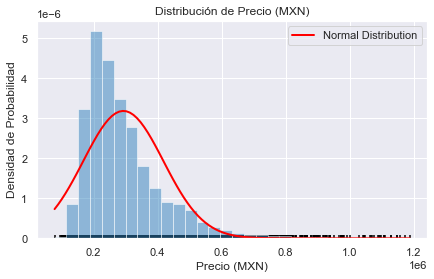

In [37]:
# Convertimos valores a NumPy array y calculamos media y desviacion estandar
precio = df_regresion['precio (MXN)'].values
mu, sigma = stats.norm.fit(precio)

# Generamos valores teoricos de la distribucion normal y graficamos.
x_hat = np.linspace(min(precio), max(precio), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal Distribution', color='red')
ax.hist(precio, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.scatter(precio, np.full_like(precio, -0.01), marker='|', color='black')
ax.set_title('Distribución de Precio (MXN)')
ax.set_xlabel('Precio (MXN)')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()

plt.show()

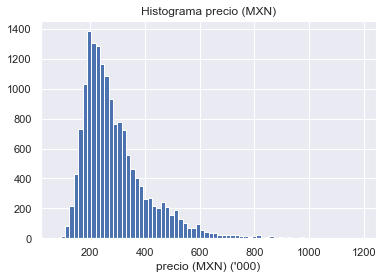

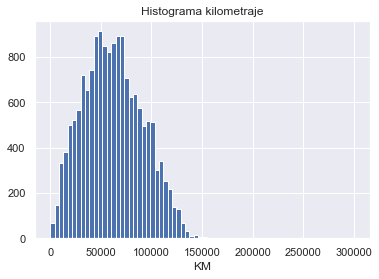

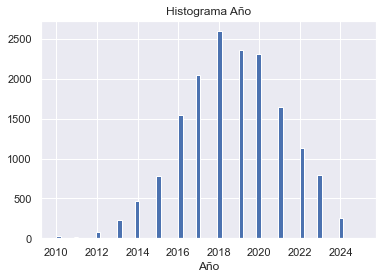

In [38]:
# Graficamos la Variable "precio"
plt.title('Histograma precio (MXN)')
plt.xlabel("precio (MXN) ('000)")
plt.hist(df_regresion['precio (MXN)']/1000, bins = 70)
plt.show() 

# Graficamos la Variable "kilometraje"
plt.title('Histograma kilometraje')
plt.xlabel("KM")
plt.hist(df_regresion['kilometraje'], bins = 70)
plt.show()

# Graficamos la Variable "año"
plt.title('Histograma Año')
plt.xlabel('Año')
plt.hist(df_regresion['año'], bins = 70)
plt.show()

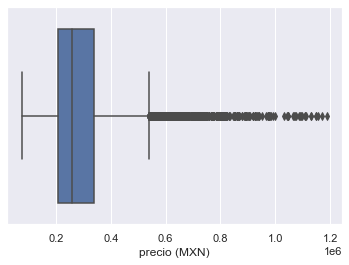

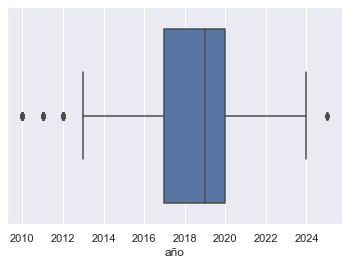

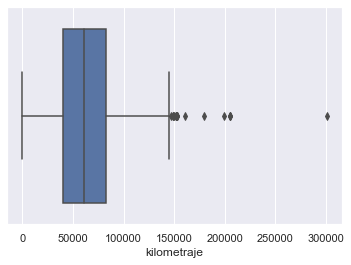

In [10]:
# Graficamos outliers de variables numericas
sns.boxplot(x=df_regresion['precio (MXN)'])
plt.show() 

sns.boxplot(x=df_regresion['año'])
plt.show() 

sns.boxplot(x=df_regresion['kilometraje'])
plt.show() 

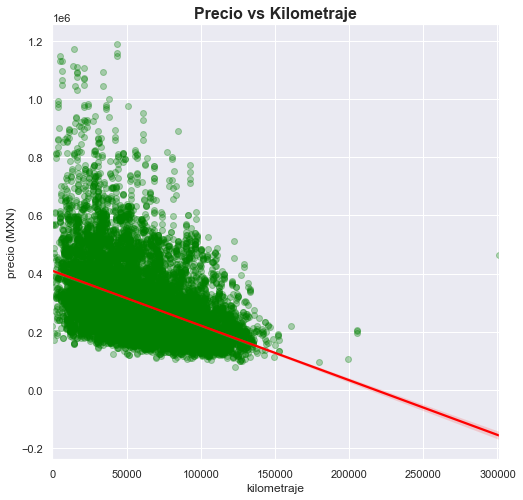

In [11]:
# Graficamos la relacion entre kilometraje & precio

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.regplot(x="kilometraje", y="precio (MXN)", data=df_regresion,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
ax.set_title('Precio vs Kilometraje',
             fontsize=16, weight="bold")
plt.show()

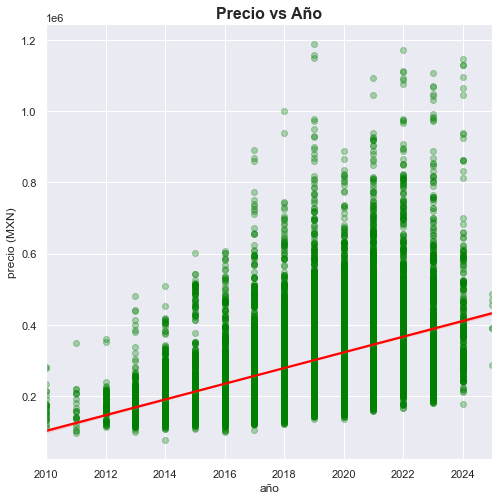

In [12]:
# Graficamos la relación entre año & precio

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.regplot(x="año", y="precio (MXN)", data=df_regresion,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
ax.set_title('Precio vs Año',
             fontsize=16, weight="bold")
plt.show()

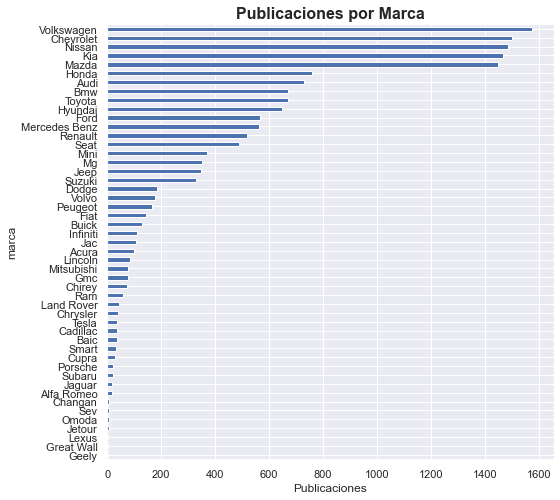

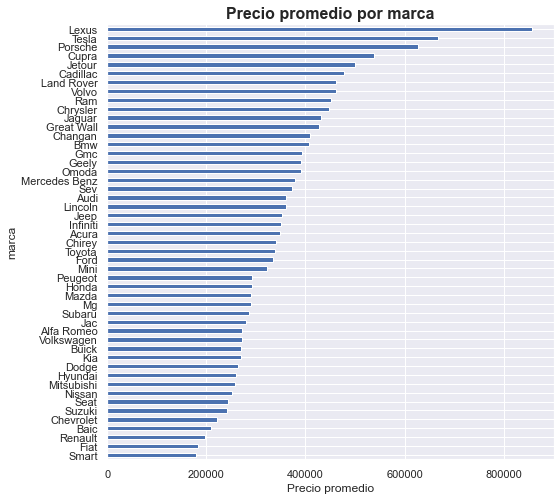

In [14]:
#Graficamos numero de publicaciones por marca

marca_count = df_regresion['marca'].value_counts(sort=False).sort_values(ascending=True)
marca_count_bar = marca_count.plot(kind='barh', y="marca", 
                           legend=False, figsize=(8, 8))
marca_count_bar.set_title("Publicaciones por Marca",
                      fontsize=16, weight="bold")
marca_count_bar.set_xlabel("Publicaciones")
plt.show()

#Calculamos precios promedios por marca y graficamos
precio_marca = df_regresion.pivot_table(index="marca",
                          values=["precio (MXN)"],
                          aggfunc='mean')
precio_marca.head()

precio_marca.sort_values("precio (MXN)", ascending=True, inplace=True)
precio_marca_bar = precio_marca.plot(kind="barh", y="precio (MXN)", figsize=(8, 8), legend=False)

precio_marca_bar.set_xlabel("Precio promedio")
precio_marca_bar.set_title("Precio promedio por marca",
                  fontsize=16, weight="bold")
plt.show()

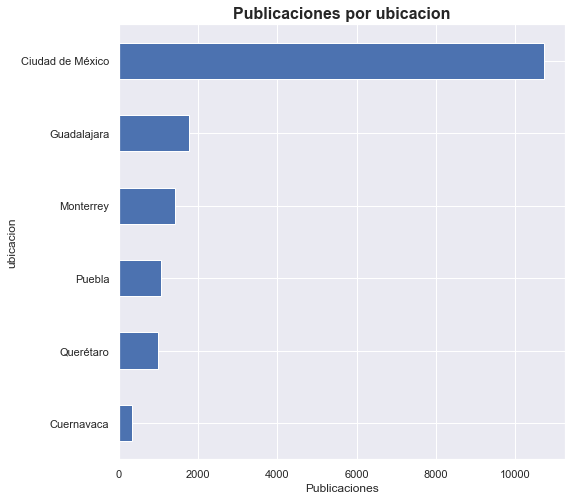

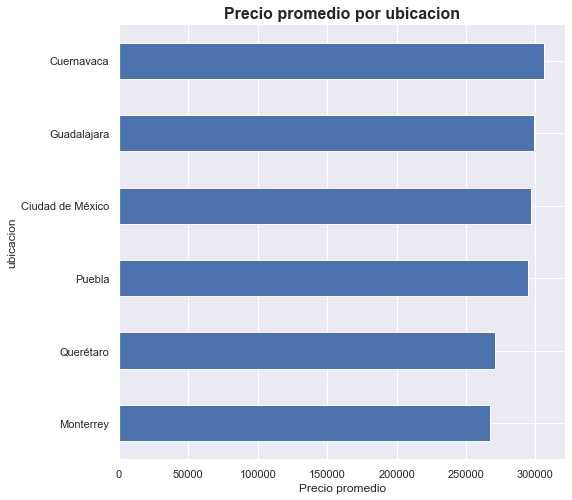

In [15]:
#Graficamos numero de publicaciones por ubicacion

ubicacion_count = df_regresion['ubicacion'].value_counts(sort=False).sort_values(ascending=True)
ubicacion_count_bar = ubicacion_count.plot(kind='barh', y="ubicacion", 
                           legend=False, figsize=(8, 8))
ubicacion_count_bar.set_title("Publicaciones por ubicacion",
                      fontsize=16, weight="bold")
ubicacion_count_bar.set_xlabel("Publicaciones")
plt.show()

#Calculamos precios promedios por ubicacion y graficamos
precio_ubicacion = df_regresion.pivot_table(index="ubicacion",
                          values=["precio (MXN)"],
                          aggfunc='mean')
precio_ubicacion.head()

precio_ubicacion.sort_values("precio (MXN)", ascending=True, inplace=True)
precio_ubicacion_bar = precio_ubicacion.plot(kind="barh", y="precio (MXN)", figsize=(8, 8), legend=False)

precio_ubicacion_bar.set_xlabel("Precio promedio")
precio_ubicacion_bar.set_title("Precio promedio por ubicacion",
                  fontsize=16, weight="bold")
plt.show()

In [16]:
# Step 4: Get Feature Importance
feature_importance = model.feature_importances_

# Step 5: Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting 'Precio (MXN)'")
plt.show()

NameError: name 'model' is not defined